In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [41]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
import kagglehub
naveenkumar20bps1137_parkinsons_disease_detection_path = kagglehub.dataset_download('naveenkumar20bps1137/parkinsons-disease-detection')

print('Data source import complete.')



Data source import complete.


In [43]:
print(naveenkumar20bps1137_parkinsons_disease_detection_path)


C:\Users\USER\.cache\kagglehub\datasets\naveenkumar20bps1137\parkinsons-disease-detection\versions\1


In [44]:
import os

# List all files in the dataset directory
files = os.listdir(naveenkumar20bps1137_parkinsons_disease_detection_path)
print("Files in the dataset:", files)


Files in the dataset: ['parkinsons.data', 'parkinsons.names', 'telemonitoring']


In [45]:
import pandas as pd

# Path to the file
data_path = r"C:\Users\USER\.cache\kagglehub\datasets\naveenkumar20bps1137\parkinsons-disease-detection\versions\1\parkinsons.data"

# Load the data, assuming it's CSV-like
df = pd.read_csv(data_path, sep=',')  # Adjust `sep` if needed (e.g., `'\t'` for tab-delimited)

# Display the first few rows
print(df.head())

print(df.shape)


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [46]:
df = df.drop(columns=['name'])

In [47]:
features = df.drop(columns=['status'])
target = df['status']

In [48]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features) 
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)  # Keep column names
print(normalized_features_df.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1

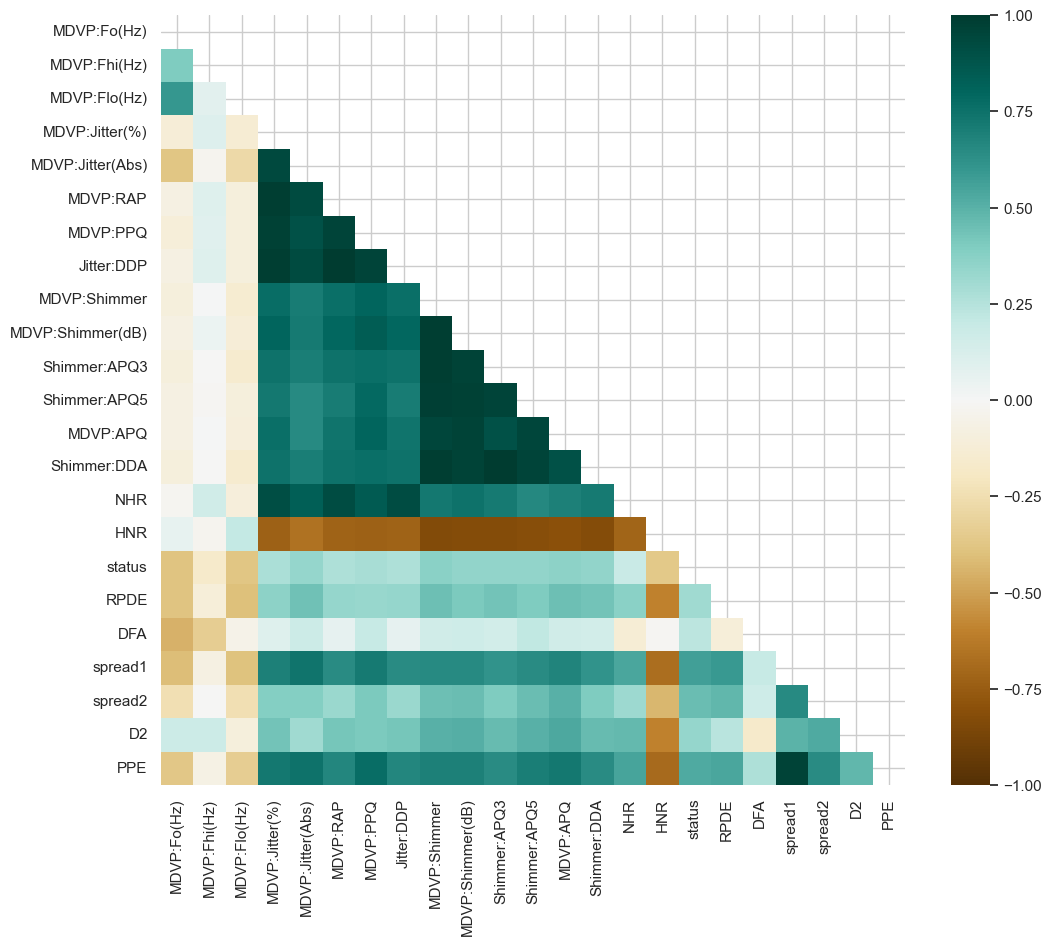

In [49]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))  # Replace np.bool with bool
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG', mask=mask)
plt.show()


Text(0.5, 1.0, 'Features Correlating with Parkinson existance')

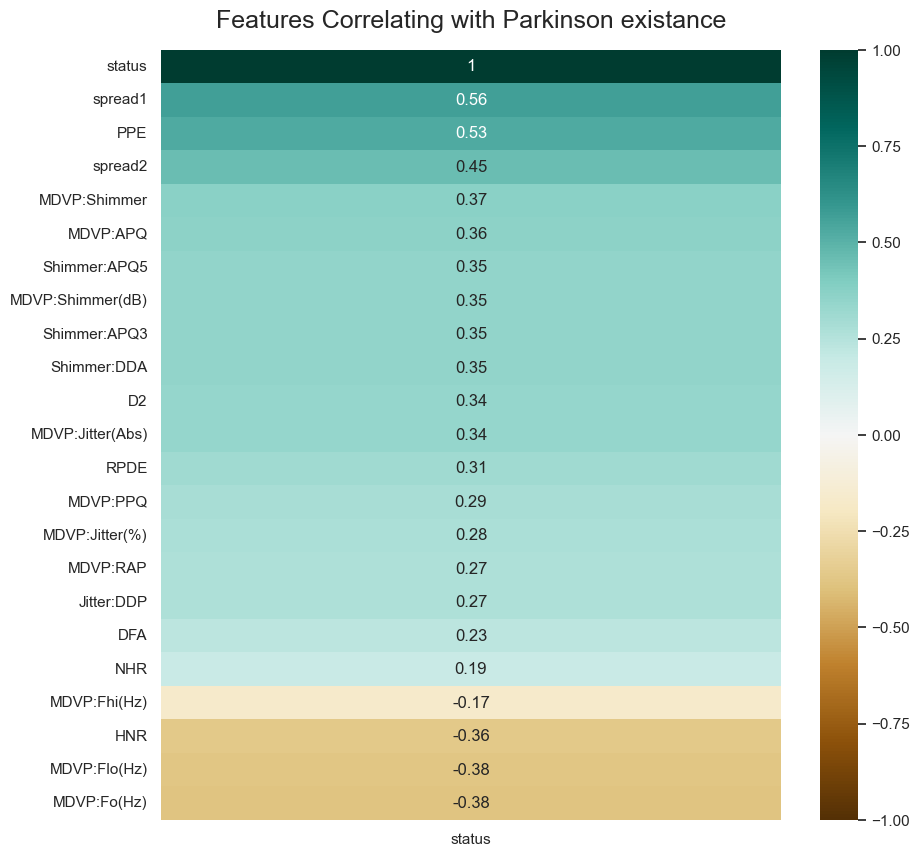

In [50]:
# modify the headmap plot to show correlation variables to the status 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance', fontdict={'fontsize':18}, pad=16)

In [52]:
from sklearn.decomposition import PCA

# Perform PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(normalized_features)

# Convert the principal components into a DataFrame for better interpretability
principal_components_df = pd.DataFrame(
    principal_components,
    columns=[f"PC{i+1}" for i in range(principal_components.shape[1])]
)
principal_components_df.columns = normalized_features_df.columns[:principal_components_df.shape[1]]
print(principal_components_df.head())
print(f"Number of components selected: {principal_components.shape[1]}")

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0     2.096614     -1.550607      1.265070       -0.840002          0.726869   
1     4.709331     -1.334593      1.057654       -2.139739          1.177907   
2     3.852615     -1.426221      1.824965       -1.163920          1.265558   
3     4.134771     -1.581914      1.388036       -1.463193          1.405647   
4     5.689690     -1.150314      2.421017       -1.344791          0.849936   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  
0  1.101991  0.538584   -0.162566  
1  0.754064 -0.102320   -0.232575  
2  0.568478  0.047684   -0.103205  
3  0.617057 -0.016264   -0.169903  
4  0.939659  0.107455   -1.126961  
Number of components selected: 8


## We evaluate the model with the applied pca

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(principal_components_df, target, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name} scores:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.2f}")



Logistic Regression scores:
Accuracy: 0.90
Precision: 0.89
Recall: 1.00
F1-Score: 0.94
ROC-AUC: 0.71

K-Nearest Neighbors scores:
Accuracy: 0.95
Precision: 0.94
Recall: 1.00
F1-Score: 0.97
ROC-AUC: 0.86

Support Vector Machine scores:
Accuracy: 0.90
Precision: 0.89
Recall: 1.00
F1-Score: 0.94
ROC-AUC: 0.71

Random Forest scores:
Accuracy: 0.87
Precision: 0.91
Recall: 0.94
F1-Score: 0.92
ROC-AUC: 0.75


In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Adding a Neural Network
# Build the neural network
nn_model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
nn_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Evaluate the neural network
nn_predictions = nn_model.predict(X_test).flatten()
nn_predictions_binary = (nn_predictions > 0.5).astype(int)

# Calculate metrics
nn_accuracy = accuracy_score(y_test, nn_predictions_binary)
nn_precision = precision_score(y_test, nn_predictions_binary)
nn_recall = recall_score(y_test, nn_predictions_binary)
nn_f1 = f1_score(y_test, nn_predictions_binary)
nn_roc_auc = roc_auc_score(y_test, nn_predictions)


print("Neural Network Results: ")

print(f"Accuracy: {nn_accuracy:.2f}")
print(f"Precision: {nn_precision:.2f}")
print(f"Recall: {nn_recall:.2f}")
print(f"F1-Score: {nn_f1:.2f}")
print(f"ROC-AUC: {nn_roc_auc:.2f}")




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Neural Network Results: 
Accuracy: 0.87
Precision: 0.89
Recall: 0.97
F1-Score: 0.93
ROC-AUC: 0.90


In [77]:
import parselmouth
import os

# File path for the input audio
file_path = "recording.wav"

# Load the audio file
sound = parselmouth.Sound(file_path)

print("Processing {}...".format(file_path))
s = sound.copy()  # Create a copy of the sound
s.pre_emphasize()

# Save the pre-emphasized sound to new files
pre_emphasized_wav = os.path.splitext(file_path)[0] + "_pre.wav"
pre_emphasized_aiff = os.path.splitext(file_path)[0] + "_pre.aiff"
s.save(pre_emphasized_wav, 'WAV')  # Save as WAV
s.save(pre_emphasized_aiff, 'AIFF')  # Save as AIFF

print(f"Pre-emphasized files saved as:\n{pre_emphasized_wav}\n{pre_emphasized_aiff}")


Processing recording.wav...
Pre-emphasized files saved as:
recording_pre.wav
recording_pre.aiff


In [85]:
import librosa
import numpy as np
import pandas as pd
from scipy.stats import variation

# Function to extract features from the audio
def extract_voice_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # 1. Fundamental frequency (MDVP:Fo)
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    pitch = np.mean(pitches)

    # 2. Maximum pitch (MDVP:Fhi)
    max_pitch = np.max(pitches)

    # 3. Minimum pitch (MDVP:Flo)
    min_pitch = np.min(pitches)

    # 4. Jitter (MDVP:Jitter)
    f0 = librosa.yin(y, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))
    jitter = variation(f0)

    # 5. Absolute jitter (MDVP:Jitter(Abs))
    abs_jitter = np.mean(np.abs(np.diff(f0)))

    # 6. Relative Average Perturbation (MDVP:RAP)
    rap = np.mean(np.abs(np.diff(f0) / f0[:-1]))

    # 7. Pitch Period Perturbation Quotient (MDVP:PPQ)
    ppq = np.mean(np.abs(np.diff(f0) / (f0[:-1] + f0[1:])))

    # 8. Difference of Differences of Periods (Jitter:DDP)
    ddp = np.mean(np.abs(np.diff(np.diff(f0))))

    # Create a dictionary of the extracted features
    features = {
        "MDVP:Fo(Hz)": pitch,
        "MDVP:Fhi(Hz)": max_pitch,
        "MDVP:Flo(Hz)": min_pitch,
        "MDVP:Jitter(%)": jitter,
        "MDVP:Jitter(Abs)": abs_jitter,
        "MDVP:RAP": rap,
        "MDVP:PPQ": ppq,
        "Jitter:DDP": ddp
    }

    return features

# Example usage
audio_path = "Recording.wav"
features = extract_voice_features(audio_path)
print(pd.DataFrame([features]))


   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0     4.051665    2687.00415           0.0        3.091923         70.189477   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  
0  0.743548  0.090017  138.674034  
